## 데이터 불러오기 및 분석하기

In [ ]:
#conda install numpy scipy joblib scikit-learn --force-reinstall

In [185]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from sklearn.model_selection import train_test_split

파일불러오기

In [186]:
import os
print(os.getcwd())

c:\Users\dkq50\OneDrive\바탕 화면\자연어처리\프로젝트\CNN


In [187]:
print('파일 크기: ')
for file in os.listdir():
  if 'csv' in file:
    print(file.ljust(30)+str(round(os.path.getsize(file) / 100000,2))+'MB')

파일 크기: 
comment_suc.csv               3.2MB
stopwords.csv                 0.06MB
test_data.csv                 20.53MB
train_data.csv                185.97MB


In [188]:
train_data = pd.read_csv('train_data.csv', encoding='utf-8')

In [189]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    14
1    12
2    32
3    23
4    11
Name: document, dtype: int64

In [190]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 386
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 33.30
리뷰 길이 표준편차: 28.81
리뷰 길이 중간값: 25.0
리뷰 길이 제1사분위: 15.0
리뷰 길이 제3사분위: 40.0


## 데이터 빈도 분석- 워드 클라우드 만들기

In [191]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['좀뻔한스토리다 뻔한결말이고',
 '원작의 느낌을 망쳐놨다',
 '년대 느와르액션을 아직도 고집하는 홍콩영화오버액션의 진수다',
 '말이 필요 없어요 완전 감동 소중한 드라마',
 '찬물끼얹기 피헤헤헤헿',
 '재밌어욯ㅎ',
 '이건 여성우월주의가 아니라 성별이 갖는 이미지 차이의 요소를 적절히 쓴 영화인듯평점에 여성우월주의라느니 해서 봤는데 그런 느낌은 하나도 못받았음 어진짜 별 내용도 없고 스토리도 별로 였지만 중간중간 웃긴거 있었고 배우 좋아하니까흠',
 '이거 점은 못주나요',
 '전체적으로 다 괜찮네요',
 '그 어떤 위인도 이태석 신부님만큼 착하진 못했을거 같다후같은 인간으로써 참으로 부끄럽게 만드는 영화',
 '평점에 속았다ㅠㅠㅠ 우뢰뫼보다 더 최악이다',
 '꼭 보시기 바랍니다',
 '중학교때 단체관람했던영화오랜만에생각나길래 평점보러왔는데   평이 다 장난스러운이유는뭐지난정말감명깊게보았구 클레멘타인하는노래소리가 지금도 귓가를맴돈다 내용은세세히기억안나지만 가슴이찡했던기억이난다 왜망작이라하며놀리는거지ㅠㅠ이해안가',
 '스토리의 아이디어는 좋은데 그걸 전혀 효과적으로 살리지 못했다 매끄럽지도 효율적이지도 못하고 내내 남자와 아이에게 얽매이는 여성상 무미건조하고 초보적인 공포 평면적 전개 오랜만에 본 중국영화는 역시 실망이었다',
 '한국영화보다는 훨씬낫다',
 '스토리도 딱히 없는 그냥 단순 액션 영화 속옷 차림으로 총 쏴대는 악당 여자만 기억에 남는 영화',
 '잗같은 세상 현실이다 이게 근데 승자는 언제나 잗같은 넘들이 하는구나 결말이라도 통쾌했으면 좋았을텐데',
 '다이 하드나 스피드보다 더 재밌다고 생각하는 영화 ㅎㅎ',
 '무서워잉 이상 자',
 '공포영화보고 웃은적은 처음',
 '명배우들의 명연기에 소름이 쫙',
 '최정원이 이뻐서 별 해피엔딩이라 별 웃긴장면은 장면정도',
 'ㅡㅡ 할말을 잃게 만드는 영화',
 '모든걸 내려 놓으라고 말해주는 영화다',
 '레이디 수잔의 연기가 압권이네요 정말 제인 오스틴 작품을 빛나게 해주었네요 ',


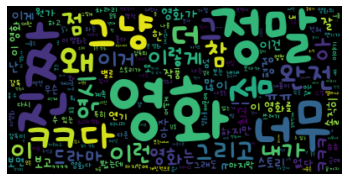

In [192]:
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud = WordCloud('유지체.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [193]:
#긍정 1, 부정 0
print('긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수: 89372
부정 리뷰 갯수: 88298


## 데이터 전처리
#### 데이터 전처리는 5단계로 이루어져 있습니다.

1. 정규화로 한국어만 남기기

2. 형태소 분석기로 어간 추출하기

3. 불용어 제거하기

4. 문자를 인덱스벡터로 전환하기

5. 패딩처리하기

한국어 텍스트를 전처리할 때는 konlpy를 사용하여 형태소 분석 실시

In [194]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

train_data = pd.read_csv('train_data.csv', encoding='utf-8')

train_data['document'][:5]

0                      좀뻔한스토리다 뻔한결말이고
1                        원작의 느낌을 망쳐놨다
2    년대 느와르액션을 아직도 고집하는 홍콩영화오버액션의 진수다
3             말이 필요 없어요 완전 감동 소중한 드라마
4                         찬물끼얹기 피헤헤헤헿
Name: document, dtype: object

1. 전처리를 도와주는 함수 만들기

In [195]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

2. 전체 학습데이터 및 평가데이터 리뷰 전처리하기

In [196]:
# 불용어 리스트 만들기
a = pd.read_csv('stopwords.csv', encoding = 'cp949')
stop_words = []
for i in range(0, 677):
    stop_words.append(a['stopwords'][i])
    
stop_words

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [197]:
# 전체 텍스트 전처리
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['뻔하다', '스토리', '다', '뻔하다', '결말', '이고'],
 ['원작', '느낌', '망치다'],
 ['년대', '느와르', '액션', '아직도', '고집', '하다', '홍콩영화', '오버액션', '진수', '다'],
 ['말', '필요', '없다', '완전', '감동', '소중하다', '드라마']]

In [198]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv('test_data.csv', encoding='utf-8')

clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

3. 문자로 되어있는 리뷰데이터를 인덱스 벡터로 변환

* 학습데이터 리뷰로 단어 사전을 생성하여 리뷰데이터를 인덱스로 바꾸어줌

* 라벨데이터(긍정, 분석 감정데이터, 정답 데이터)는 벡터화 실시

In [199]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

4. 전처리 완료된 데이터 넘파이 파일로 저장

In [201]:
os.getcwd()

'c:\\Users\\dkq50\\OneDrive\\바탕 화면\\자연어처리\\프로젝트\\CNN'

In [202]:
DEFAULT_PATH  = './+다음/'
DATA_PATH = 'data/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH  + DATA_CONFIGS,'w'),ensure_ascii=False)

학습하기

1. 학습데이터 및 전처리 데이터 불러오기

In [203]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
DATA_PATH = './+다음/data/'
DATA_OUT = './+다음/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

2. 파라미터 세팅하기

In [204]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 20
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

3. 모델 함수 만들기
* 학습 모델 : CNN분류 모델

In [205]:
class CNNClassifier(tf.keras.Model):
    
  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

4. 학습하기
* 에포크는 10으로 주어 학습을 진행하고, 검증 정확도가 그전보다 낮아지면 학습을 멈추도록 설계

In [206]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'\weogjts.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

./+다음/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/20
313/313 [==============================] - 16s 49ms/step - loss: 0.4511 - accuracy: 0.7798 - val_loss: 0.3865 - val_accuracy: 0.8197

Epoch 00001: val_accuracy improved from -inf to 0.81967, saving model to ./+다음/DATA_OUT/cnn_classifier_kr\weogjts.h5
Epoch 2/20
313/313 [==============================] - 15s 48ms/step - loss: 0.3496 - accuracy: 0.8466 - val_loss: 0.3790 - val_accuracy: 0.8272

Epoch 00002: val_accuracy improved from 0.81967 to 0.82721, saving model to ./+다음/DATA_OUT/cnn_classifier_kr\weogjts.h5
Epoch 3/20
313/313 [==============================] - 15s 49ms/step - loss: 0.2987 - accuracy: 0.8738 - val_loss: 0.3899 - val_accuracy: 0.8264

Epoch 00003: val_accuracy did not improve from 0.82721
Epoch 4/20
313/313 [==============================] - 15s 48ms/step - loss: 0.2554 - accuracy: 0.8948 - val_loss: 0.4114 - val_accuracy: 0.8238

Epoch 00004: val_accuracy did not improve from 0.82721


평가하기

In [207]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights(DATA_OUT + model_name + '/weogjts.h5')
model.evaluate(test_input, test_label_data)

617/617 [==============================] - 1s 1ms/step - loss: 0.3784 - accuracy: 0.8294


[0.3784123361110687, 0.8293992280960083]

### 예측하기

In [208]:
a = pd.read_csv('c:/Users/dkq50/OneDrive/바탕 화면/자연어처리/프로젝트/project-nlp-main/data/stopwords2.csv', encoding = 'cp949')
stopwords = list(a['stopwords'])

In [209]:
heal = ['여수 밤바다', '파주 평화누리공원', '순천 갈대밭', '제주도 영실코스', 
         '진주 진양호', '장흥유원지', '대구 앞산정만대', '춘천 해피초원농장' ,' 속초 해수욕장', 
         '경주 불국사', '포항 호미곶', '남해 두모마을', '대관령 하늘목장', '군산 철길마을', 
         '국립 광릉수목원', '금선사 템플스테이', '보성 제암산자연휴양림','군산 선유도']
 
extreme= ['통영 어드벤처 타워', '제주도  스쿠버다이빙', '단양 패러글라이딩', 
          '강원 내린천 래프팅', '충주 스카이다이빙', '하남 스포츠몬스터', '서울 한강 워터 제트팩', 
          '일산 인공 서핑', '영월 동강래프팅', '여수 스카이플라이', '문경 패러글라이딩', 
          '경남 하동 하동알프스레포츠', '인천 스카이 짚라인', '강화 루지']
 
movie=['루카','콰이어트 플레이스','크루엘라','컨저링 3:악마가 시켰다','여고괴담 여섯번째 이야기','분노의 질주: 더 얼티메이트','캐시트럭',
'클라이밍',
'그 여름, 가장 차가웠던',
'폭력의 그림자',
'청춘 선거',
'그레타 툰베리',
'낫아웃',
'마세티 킬즈',
'프로페서 앤 매드맨',
'화이트 온 화이트',
'아야와 마녀',
'까치발',
'플래시백',
'애플',
'혼자 사는 사람들',
'강호아녀',
'파이프라인',
'분노의 질주']
 
#음악 (네이버 바이브 참고 1위~20위)
 
k_balad=['Timeless-SG워너비',
'추적이는 여름 비가 되어-장범준',
'밤하늘의 별을 (2020)-경서',
'어떻게 이별까지 사랑하겠어, 널 사랑하는 거지-AKMU (악동뮤지션)',
'내 입술 따뜻한 커피처럼-청하 Colde(콜드)',
'서울의 잠 못 이루는 밤 (Feat. 이수현)-10CM',
'잠이 오질 않네요-장범준',
'I Love U-성시경',
'내사람 (Partner For Life)-SG워너비',
'취기를 빌려-산들',
'안녕 (Hello)-조이',
'밤편지-아이유(IU)',
'Anti-Romantic-투모로우바이투게더',
'너의 모든 순간-성시경',
'좋을텐데 (If Only) (Feat. 폴킴)-조이',
'봄 안녕 봄-아이유(IU)',
'Love poem -아이유(IU)',
'아이와 나의 바다-아이유(IU)',
'벌써 일년-반하나& MJ(써니사이드)',
'이렇게 좋아해 본 적이 없어요 -CHEEZE (치즈)'
]
 
k_dance=[
'Butter-방탄소년단',
'Next Level-aespa',
'Dun Dun Dance-오마이걸(OH MY GIRL)',
'치맛바람 (Chi Mat Ba Ram)-브레이브걸스(Brave Girls)',
'Alcohol-Free-TWICE(트와이스)',
"롤린 (Rollin')-브레이브걸스(Brave Girls)",
'라일락-아이유(IU)',
'ASAP-STAYC(스테이씨)',
'Dynamite-방탄소년단',
'상상더하기-MSG워너비',
'Celebrity-아이유(IU)',
'상상더하기-라붐(LABOUM)',
'Ready to love-세븐틴',
'Dolphin-오마이걸(OH MY GIRL)',
'Lovesick Girls-BLACKPINK',
'Pool Party (Feat. 이찬 of DKB)-브레이브걸스(Brave Girls)',
"Heaven's Cloud-세븐틴",
'체념-정상동기(김정수, 정기석, 이동휘, 이상이)',
'어푸 (Ah puh)-아이유(IU)',
]
 
k_hip=[
'마.피.아. In the morning-ITZY(있지)',
'봄날-방탄소년단',
'Life Goes On-방탄소년단',
'맛 (Hot Sauce)-NCT DREAM',
'밸런스 게임-투모로우바이투게더',
'GAM3 BO1-세븐틴',
'비도 오고 그래서 (Feat. 신용재)-헤이즈 (Heize)',
'METEOR-창모(CHANGMO)',
'DNA-방탄소년단',
'IDOL-방탄소년단',
'FAKE LOVE-방탄소년단',
'피 땀 눈물-방탄소년단',
'사이렌-호미들',
'멜로디-ASH ISLAND',
'I NEED U-방탄소년단',
'아무노래-지코 (ZICO)',
'어떻게 지내 (Prod. By VAN.C)-오반(OVAN)',
'Rainy day (Feat. ASH ISLAND, Skinny Brown)-PATEKO(파테코)',
'뚜두뚜두 (DDU-DU DDU-DU)-BLACKPINK']
 
 
trt=[
'이제 나만 믿어요-임영웅',
'별빛 같은 나의 사랑아-임영웅',
'다시 사랑한다면 (김필 Ver.)-임영웅',
'HERO-임영웅',
'미워요-임영웅',
'잊어야 한다는 마음으로-임영웅',
'계단말고 엘리베이터-임영웅',
'소나기-임영웅',
'바보같지만-임영웅',
'따라따라-임영웅',
'당신-임영웅',
'내 마음 별과 같이-임영웅',
'고맙소-김호중',
'만개 (Prod. 신지후)-김호중',
'나보다 더 사랑해요-김호중',
'애인이 되어줄게요 (Prod. 알고보니, 혼수상태)-김호중',
'퇴근길-김호중',
'할무니-김호중',
'우산이 없어요-김호중',
'천년의 사랑-김호중'
]
 
 
f_dance=[
'You-Regard, Troye Sivan, Tate McRae',
'Closer (Feat. Halsey)-The Chainsmokers',
'Faded-Alan Walker',
'One Kiss-Calvin Harris, Dua Lipa',
'Heartbreak Anthem-Galantis, David Guetta, Little Mix',
'Something Just Like This-The Chainsmokers, Coldplay',
'This Is What You Came For (Feat. Rihanna)-Calvin Harris',
'The Middle-Zedd, Grey, Maren Morris',
'Symphony (Feat. Zara Larsson)-Clean Bandit',
'Wake Me Up-Avicii',
'Waste It On Me (Feat. BTS(방탄소년단))-Steve Aoki',
'How To Love (Feat. Sofia Reyes)-Cash Cash',
'Bad Boy (with Wiz Khalifa, bbno$, MAX)-Yung Bae, Wiz Khalifa, bbno$, MAX',
'Titans (Feat. Sia & Labrinth) (Imanbek Remix)-Major Lazer',
'Feels (Feat. Pharrell Williams, Katy Perry, Big Sean)-Calvin Harris',
'Rise (Feat. Jack & Jack)-Jonas Blue',
'Mama (Feat. William Singe)-Jonas Blue',
'Just Got Paid (Feat. French Montana)-Sigala, Ella Eyre, Meghan Trainor',
'Love Line-Shift K3y, Tinashe',
'Lonely Together (Feat. Rita Ora)-Avicii'
]
 
newage=[
'River Flows In You-이루마',
'Letter From The Earth (지구에서 온 편지)-김광민',
'익숙한 그 집 앞-유희열',
'처음부터 지금까지 (Inst.)-박정원',
'냉정과 열정 사이 OST (冷靜と情熱のあいだ)-Ryo Yoshimata',
'''Tomorrow's Promise-Kevin Kern''',
"Mia & Sebastian's Theme-Justin Hurwitz",
'Recuerods de la Alhambra (알함브라 궁전의 추억)-Claude Ciari',
'''Gabriel's Oboe-Ennio Morricone''',
'Rain-Ryuichi Sakamoto',
'Romance-Yuhki Kuramoto',
'Second Romance-Yuhki Kuramoto',
'Crystal Rainbow-데이드림(Daydream)',
'My Road (Live)-Lee Oskar',
'Last Carnival-Acoustic Cafe',
'Return To The Heart-David Lanz',
'Adagio-Secret Garden',
'Loving You-Kenny G'
]

korean = ["삼계탕", "삼겹살", "곱창", "찜닭", "오리고기", "소고기", 
          "국밥", "닭도리탕", "낙곱새", "라면", "비빔밥", "칼국수", 
          "수제비", "갈비", "제육볶음"]

western = ["스테이크", "파스타", "필라프", "감바스", "리조또", "샐러드", 
           "피자", "빠에야", "플래터", "스튜"]

asian = ["짜장면", "뿌팟퐁커리", "팟타이", "나시고랭", "쌀국수", "미고랭",
         "카레", "마라탕", "마라샹궈", "훠궈", "돈까스", "월남쌈", "라멘", 
         "탄탄멘", "규동", "꿔바로우", "똠양꿍", "물냉면"]

spicy = ["떡볶이", "김치찜", "김치찌개", "감자탕", "짬뽕", "닭발", "부대찌개",
         "순두부찌개", "아구찜", "해물찜", "육개장", "낙지볶음", "쭈꾸미", 
         "돼지갈비찜", "소꼬리찜", "비빔냉면"]

dessert = ["와플", "마카롱", "빙수", "크로크모슈", "케이크", "허니바게트볼",
           "머쉬룸수프볼", "에그데니쉬", "케이크", "치아바타", "호두파운드케이크",
           "쿠키", "허니브레드", "오믈렛", "베이글"]

snack = ["닭강정", "양꼬치", "핫윙", "소떡소떡", "가라아게", "콘치즈", "감자튀김", 
         "치킨너겟", "치킨", "낫쵸", "소시지", "버터구이", "계란찜", "핫도그", 
         "해쉬브라운"]

coffee = ["아메리카노", "콜드브루", "바닐라 라떼", "카페 라떼", "카라멜 마키아또",
          "카페 모카", "바닐라 프라페", "카페모카 프라페", "연유 라떼", "화이트 모카",
          "민트 모카", "헤이즐넛 라떼", "에스프레소", "오곡 프라페", "쿠앤크 프라페"]

beverage = ["초코 라떼", "민트초코 라떼", "밀크티", "흑당 버블티", "레몬차", "자몽차",
            "유자차", "모히토", "요거트 스무디", "블루베리 스무디", "딸기 스무디", "애플망고 스무디",
            "레몬 에이드", "자몽 에이드", "생과일 주스"]

motivation = ["자신을 믿어라. 자신의 능력을 신뢰하라. 겸손하지만 합리적인 자신감 없이는 성공할 수도 행복할 수도 없다. - 노먼 빈센트 필",
"조금 더 많이 인내하자. 조금 더 많이 노력하자. 그러면 절망적 실패로 보였던 것이 빛나는 성공으로 변할 수 있다. - 알버트 휴버드",
"당신이 인생의 주인공이기 때문이다. 그 사실을 잊지말라. 지금까지 당신이 만들어온 의식적 그리고 무의식적 선택으로 인해 지금의 당신이 있는것이다. - 바바라 홀",
"먹는 칼로리보다 에너지 소모가 적으면 살이 찌듯이, 걱정만 하고 행동하지 않으면 걱정이 찐다.",
"이미 끝나버린 일을 후회하기 보다는 하고 싶었던 일을 하지 못한 것을 후회하라 - 탈무드",
"기회가 주어지면 최선을 다하는 것이 아니라 최선을 다하고 있으면 기회가 주어지는 것이다 - 신영준",
"낭비한 시간에 대한 후회는 더 큰 시간 낭비이다 - 메이슨 쿨리",
"성공은 매일 부단하게 반복된 작은 노력의 합산이다.",
"현명한 사람은 앉아서 손해 본 것을 한탄만 하지 않고 즐겁게 그 손해를 회복할 방법을 찾는다. - 셰익스피어",
"고통을 주지 않는것은 쾌락도 주지 않는다 - 몽테뉴",
"시간은 간다",
"살아가는 사람들 중 대부분은 자신에게 올 기회를 기다리나 기회라는 것은 기다리는 사람에게는 쉽게 오지 않는 법이다",
"기회를 얻을 수 있게 기다리는 사람이 되기보다는 기회를 얻을 수 있는 실력을 먼저 쌓아야 한다. 자신이 하는 일에 열중하고 노력하다보면 자연스럽게 기회는 찾아온다.",
"변화를 위해서 가장 중요한 것은 행동하는 첫걸음이다.",
"무엇이든 하루아침에 만들어지는 것은 없다. 로마 또한 하루아침에 만들어지지 않았다. 이 말은 무언가를 만들기 위해서는 그것을 만들기 위해 노력하고 집중 해야 한다는 것이다.",
"스스로를 믿고 자신이 가지고 있는 능력을 신뢰해야 한다. 하지만 거만하게 행동하지 말고 겸손해라. 성공을 위해서 자신감이 필요하지만 오만함은 필요하지 않다.",
             "끝난 일은 언급할 필요가 없으며 지난 일은 허물을 물을 필요가 없다. - 공자",
"어렵고 힘든 상황일수록 서두르지 말고 침착해라. 성급하게 하는 행동에는 실수가 포함되기 쉽다.",
"나의 하루를 설명할 수 있는 사람이 곁에 있다는 건 생각보다 기분 좋은 일이야 그러니 너도 생각보다 좋은 사람이지 - 흔글",
"잠 못 자고 있지, 얼른 자, 걱정하는 일 안 생겨 좋은 일은 아니더라도 아무 일 없을 거야 혼자 있는 새벽을 걱정으로 보내지는 마 - 흔글",
"봄바람도 살랑살랑 불고 꽃도 예쁘게 피어있으니 얼마나 놀고 싶겠냐만은, 그래도 그 시간들을 이겨내면 너의 인생에 꽃이 필 테니 조금만 참고 바람을 이겨내기를 - 흔글"]



In [210]:
from tensorflow.keras.models import load_model
import random
from konlpy.tag import Okt
import os
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import re
import json

In [211]:
category = [heal,extreme,movie,k_balad,k_dance,k_hip,trt,f_dance,newage,korean,western,asian,spicy,dessert,snack,coffee,beverage]
f8 = [extreme,movie,k_balad,k_dance,k_hip,trt,f_dance,korean,western,asian,spicy,dessert,snack,coffee,beverage]
f6 = [extreme,movie,k_balad,k_dance,k_hip,trt,f_dance,korean,western,asian,spicy,dessert,snack,coffee,beverage]
f3 = [heal,extreme,movie,k_balad,k_dance,k_hip,trt,f_dance,newage,korean,western,asian,spicy,dessert,snack,coffee,beverage, dessert]
f1 = [heal,movie,k_balad,k_dance,k_hip,trt,f_dance,newage,korean,western,asian,spicy,dessert,snack,coffee,beverage, dessert]
f0 = [heal,movie,k_balad,k_dance,k_hip,f_dance,newage,korean,western,asian,spicy,spicy,dessert,snack,snack,coffee,beverage]

corpus = []
avg_emo = 0

In [212]:
def recomend_sys(new_sentence):
    global score
    global timecheck
    global corpus
    global score
    global avg_emo

    okt = Okt()
    tokenizer  = Tokenizer()

    DATA_CONFIGS = 'data_configs.json'
    prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))
    prepro_configs['vocab'] = word_vocab

    tokenizer.fit_on_texts(word_vocab)

    MAX_LENGTH = 8 #문장최대길이

    print(new_sentence)
    sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', new_sentence)
    sentence = okt.morphs(sentence, stem=True) # 토큰화
    sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
    vector  = tokenizer.texts_to_sequences(sentence)
    pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

    model.load_weights(DATA_OUT + model_name + '\weogjts.h5') #모델 불러오기
    predictions = model.predict(pad_new)
    
    if len(predictions.squeeze(-1)) == 1:
        predictions = float(predictions.squeeze())
    else:
        predictions = float(predictions.squeeze(-1)[1])
    
    if(predictions > 0.5):
            print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))
            
    corpus.append(predictions)
    if len(corpus) >= 5:
        avg_emo = sum(corpus)/len(corpus)
        if(avg_emo > 0.8):
            pick = random.choice(f8)
            if pick == motivation: # | pick == rest:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("당신을 위한 한마디 : {1}\n".format(random.choice(pick)))
                corpus=[]
            else:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("오늘처럼 좋은 날엔 {0} 어떠신가요?\n".format(random.choice(pick)))
                corpus=[]

        elif(avg_emo > 0.6): 
            pick = random.choice(f6)
            if pick == motivation: # | pick == rest:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("당신을 위한 한마디 : {1}\n".format(random.choice(pick)))
                corpus=[]
            else:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("좋은 일있으신가요? 오늘 {0} 어떠세요?\n".format(random.choice(pick)))
                corpus=[]
                
        elif(avg_emo > 0.4) :
            pick = random.choice(category)
            if pick == motivation: # | pick == rest:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("당신을 위한 한마디 : {1}\n".format(random.choice(pick)))
                corpus=[]
            else:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("오늘같은 날에는 {0} 어때요? 기분이 좋아질거에요!!\n".format(random.choice(pick)))
                corpus=[]
                
        elif(avg_emo > 0.3) :
            pick = random.choice(f3)
            if pick == motivation: # | pick == rest:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("당신을 위한 한마디 : {1}\n".format(random.choice(pick)))
                corpus=[]
            else:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("꿀꿀한 오늘 {0} 추천해요.\n".format(random.choice(pick)))
                corpus=[]
                
        elif(avg_emo > 0.18) :
            pick = random.choice(f1)
            if pick == motivation: # | pick == rest:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("당신을 위한 한마디 : {1}\n".format(random.choice(pick)))
                corpus=[]
            else:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("오늘 {0} 어떠세요? 안좋은 기분을 환기시켜줄 거에요.\n".format(random.choice(pick)))
                corpus=[]
        else:
            pick = random.choice(f0)
            if pick == motivation: # | pick == rest:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("당신을 위한 한마디 : {1}\n".format(random.choice(pick)))
                corpus=[]
            else:
                print("기분 점수 : {0:.2f}".format(avg_emo*100))
                print("오늘 안좋은 일이 있으셨나요. 오늘같은 날 {0} 어떠세요?\n".format(random.choice(pick)))
                corpus=[]
    else:
        print('감정 분석까지 {0}개의 문장이 남았어요!'.format(5-len(corpus)))

In [227]:
recomend_sys(input())

재범오빠 행복하다
86.05% 확률로 긍정 리뷰입니다.

기분 점수 : 61.38
좋은 일있으신가요? 오늘 쭈꾸미 어떠세요?



In [214]:
recomend_sys(input())

이게 영화냐
81.97% 확률로 부정 리뷰입니다.

감정 분석까지 3개의 문장이 남았어요!


In [224]:
recomend_sys(input())

이게 영화지!
59.26% 확률로 긍정 리뷰입니다.

감정 분석까지 3개의 문장이 남았어요!


In [223]:
recomend_sys(input())

이게 영화냐?
81.97% 확률로 부정 리뷰입니다.

감정 분석까지 4개의 문장이 남았어요!


In [226]:
recomend_sys(input())

행복하다
90.97% 확률로 긍정 리뷰입니다.

감정 분석까지 1개의 문장이 남았어요!
